In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('digikala-orders.csv')

In [5]:
df.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [6]:
df['DateTime_CartFinalize'] = pd.to_datetime(df['DateTime_CartFinalize'])

In [7]:
result = df.groupby(df['DateTime_CartFinalize'].dt.to_period('M'))['ID_Order'].count()

result.head()

DateTime_CartFinalize
2013-09      6
2013-10     73
2013-11     90
2013-12    116
2014-01    141
Freq: M, Name: ID_Order, dtype: int64

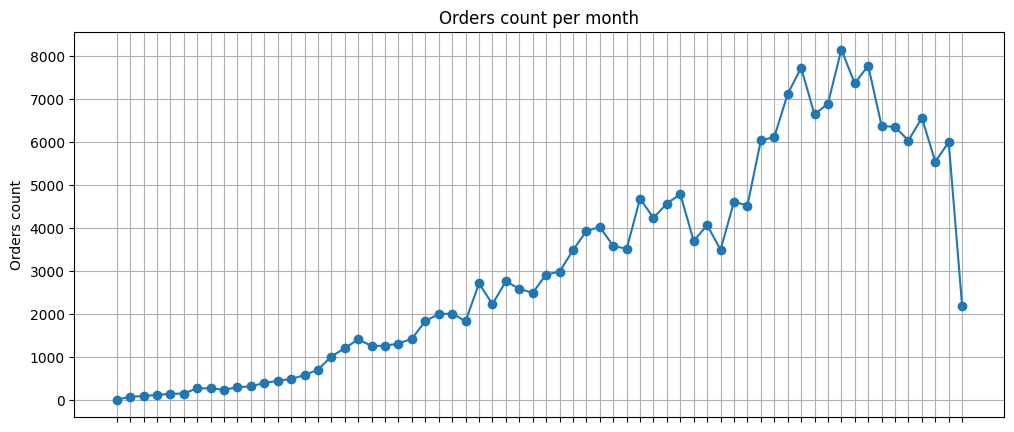

In [8]:
plt.figure(figsize=(12, 5))
plt.grid()
plt.plot(result.index.astype(str), result.values, marker='o')
plt.title('Orders count per month')
plt.gca().set_xticklabels([])
plt.ylabel('Orders count')
plt.show()

In [9]:
result = df.groupby(df['city_name_fa'])['ID_Customer'].count()

result.head()

city_name_fa
آب بر         15
آبادان       407
آباده         71
آباده طشک      3
آبدان          2
Name: ID_Customer, dtype: int64

In [10]:
result = result.sort_values(ascending=False)

In [11]:
result.index = result.index.where(result >= 5000, "Other")
result_sum = result[result.index == "Other"].sum()
result = result[result.index != "Other"]
result["Other"] = result_sum

In [12]:
result.head(10)

city_name_fa
تهران     108306
مشهد        6024
اصفهان      5992
کرج         5934
Other      73744
Name: ID_Customer, dtype: int64

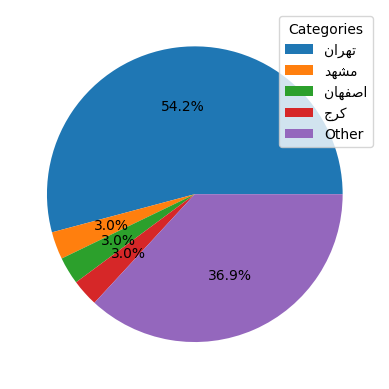

In [14]:
import arabic_reshaper
from bidi.algorithm import get_display

cities = result.index
cities = list(map(lambda x: get_display(arabic_reshaper.reshape(x)), cities))
plt.pie(result.values.astype(int), autopct='%1.1f%%')
plt.legend(cities, title="Categories", loc="best")
plt.show()